In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

In [2]:
net_data = pd.read_csv("Fertilizer-Prediction (3).csv")
net_data.head(10)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
5,26,52,35,Sandy,Barley,12,10,13,17-17-17
6,25,50,64,Red,Cotton,9,0,10,20-20
7,33,64,50,Loamy,Wheat,41,0,0,Urea
8,30,60,42,Sandy,Millets,21,0,18,28-28
9,29,58,33,Black,Oil seeds,9,7,30,14-35-14


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
net_data['Soil Type'] =le.fit_transform(net_data['Soil Type'])
net_data['Crop Type'] =le.fit_transform(net_data['Crop Type'])
net_data.head(20)


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea
5,26,52,35,4,0,12,10,13,17-17-17
6,25,50,64,3,1,9,0,10,20-20
7,33,64,50,2,10,41,0,0,Urea
8,30,60,42,4,4,21,0,18,28-28
9,29,58,33,0,5,9,7,30,14-35-14


In [4]:
features = ['Temparature','Humidity','Moisture','Nitrogen','Potassium', 'Phosphorous','Soil Type','Crop Type']
X = net_data[features]
Y = net_data['Fertilizer Name']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=3)

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf =  RandomForestClassifier(n_estimators=100)
clf =  clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         2
       20-20       1.00      1.00      1.00         3
       28-28       1.00      1.00      1.00         6
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

[[2 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 6]]


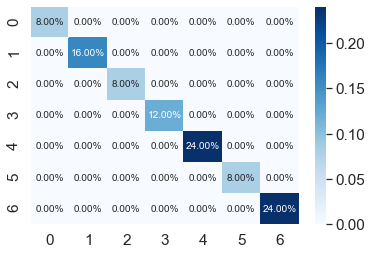

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', annot_kws={"size": 10})


In [8]:
print(clf.predict([[39, 64, 50,2,41,0,0,8]]))

['10-26-26']


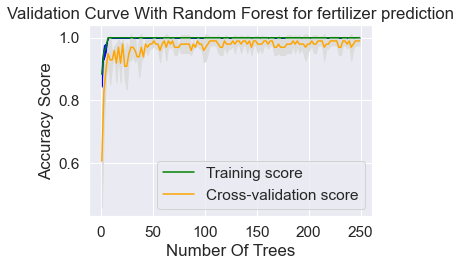

In [30]:
from sklearn.model_selection import validation_curve
# Create range of values for parameter
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(clf, 
                                             X, 
                                             Y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean, label="Cross-validation score", color="orange")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest for fertilizer prediction")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [7]:
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Score for fertilizer prediction:",accuracy_score*100, "%")


Accuracy: 100.0 %


In [33]:
filename= 'Fertilizer_pred_model'
pickle.dump(clf,open(filename,'wb'))
